In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18

model = resnet18(pretrained=True)
imagenet = ImageFolder('~/.torch/data/imagenet/val', 
                       transforms.Compose([transforms.CenterCrop(256),transforms.ToTensor(),
                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]))
data = next(iter(DataLoader(imagenet, batch_size=256, num_workers=4)))

In [ ]:
model.eval()
model.cuda()
data = data[0].cuda(), data[1].cuda()


## CCA

In [ ]:
from anatome import CCAHook

hook1 = CCAHook(model, "layer3.0.conv1")
hook2 = CCAHook(model, "layer3.0.conv2")
with torch.no_grad():
    model(data[0])
hook1.distance(hook2, size=8)

In [ ]:
hook1.clear()
hook2.clear()

## Loss Landscape

In [ ]:
from anatome import landscape1d
x, y = landscape1d(model, data, F.cross_entropy, x_range=(-1, 1), step_size=0.1)

In [ ]:
plt.plot(x, y)

In [ ]:
## Fourier Analysis

In [2]:
model.eval()
model.cuda()
data = data[0].cuda(), data[1].cuda()


## CCA

In [3]:
from anatome import CCAHook

hook1 = CCAHook(model, "layer3.0.conv1")
hook2 = CCAHook(model, "layer3.0.conv2")
with torch.no_grad():
    model(data[0])
hook1.distance(hook2, size=8)

tensor(-4.3772e-08, device='cuda:0')

In [4]:
hook1.clear()
hook2.clear()

## Loss Landscape

In [5]:
from anatome import landscape1d
x, y = landscape1d(model, data, F.cross_entropy, x_range=(-1, 1), step_size=0.1)

21it [00:03,  6.45it/s]


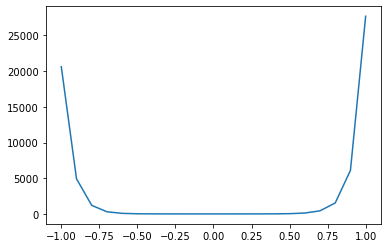

In [7]:
plt.plot(x, y)

In [8]:
## Fourier Analysis